# PPOL564 Coding Discussion 04
## Charlie Zhang

## Instruction
For this coding discussion, let's play around with some of the linear algebra concepts that we've covered in class. Specifically, let's return to our discussion of representing text as vectors and analyzing the angle between those vectors (which as we saw, offers a measure of similarity).

In the `Data/` folder, there are five separate news reports on Turkish President Erdogan addressing the murder of journalist Jamal Khashoggi in `.txt` files. Each contains the same story (relatively speaking) from different sources with different political leanings/interests. In addition to this, I also include `stop-words.csv` file containing common English words that we want to purge from our text (recall there are words that are common to all sentences, like "the" and "and", that we want to remove when comparing documents).

Use what we know about (a) reading in text files, (b) data manipulation, and (c) linear algebra to analyze the difference between these documents. Does each news site report on these stories in a similar way? Which news sites talk about the Khashoggi scandal in similar/dissimilar ways? If you change what words you remove, does the picture of similarity change?

This discussion is largely open. Probe the data however you see fit. The only restriction is that you must calculate the cosine similarity on your own. Don't rely on any canned functions that do this for you.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh

In [2]:
## Read different newspapers and stopwords
alj = open("../Data/aljazeera-khashoggi.txt", 'r').read()
bbc = open("../Data/bbc-khashoggi.txt", "r").read()
breit = open("../Data/breitbart-khashoggi.txt", "r").read()
cnn = open("../Data/cnn-khashoggi.txt", "r").read()
fox = open("../Data/fox-khashoggi.txt", "r").read()
stopwords = pd.read_csv("../Data/stop_words.csv").word.to_list()

In [3]:
def tokenize(text=None):
    '''
    The function splits the text and drops unnecessary characters.
    
    Input:
    text- strings
    
    Output:
    text_list- list of strings
    '''
    text = text.lower()
    
    ## Drop all the characters
    text = (text.replace('.','').replace(',','').
            replace('(','').replace(')', '').
            replace('[','').replace(']','').
            replace(':', '').replace(';', '').
            replace('?', '').replace('!', '').
            replace('“', '').replace('”', '').
            replace('"', '').replace('-', '').
            replace("'s", '').replace("\'ve", "").
            replace("\'re", "").replace("\'", ""))
    
    # Splits the string into words
    text_list = text.split()
    
    # Removes stop words
    text_list2 = [word for word in text_list if word not in stopwords]
    
    return text_list2

In [4]:
def convert_text_to_dtm(txt):
    '''
    The function converts text into a document term matrix.
    
    Input:
    txt- list of strings
    
    Output:
    DTM- matrix that contains the frequency of each term
    '''
    d = dict()
    for word in tokenize(txt):
        if word in d:
            d[word][0] += 1
        else:
            d[word] = [1]
    return pd.DataFrame(d)

In [5]:
# Now build a function that does this for a list of texts
def gen_DTM(texts=None):
    '''
    The function generates a document term matrix.
    
    Input:
    texts- a list of objects
    
    Output:
    DTM- matrix that contains the frequency of each term
    '''
    DTM = pd.DataFrame()
    for text in texts:
        entry = convert_text_to_dtm(text)
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind
    
    DTM.fillna(0, inplace=True) # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    return DTM

In [6]:
def cosine(a,b):
    '''
    The function generates similarity between two vectors.

    Input:
    a,b (list)- two arrays of numbers

    Output:
    float64- a number within the interval between 0 and 
    '''
    
    cos = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b)))
    return cos

In [7]:
## Generate the DTM and rename the index
DTM= gen_DTM([alj, bbc, breit, cnn, fox])

In [8]:
DTM

,$50bn,1,108,11,12,15,15member,18,2,28,...,widely,withheld,woods,world,worse,writer,yalova,yelova,£385bn,—
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,3.0


In [9]:
## Create an empty matrix to store the similarity value
DTM_sim= pd.DataFrame(index = DTM.index.values, columns = DTM.index.values)

## Use for loop to find the similarity of each two newspapers 
for i in DTM_sim.index:
    for j in DTM_sim.columns:
        DTM_sim.iloc[i,j] = cosine(DTM.iloc[i].values, DTM.iloc[j].values)

DTM_sim.index= ["Aljazeera", "BBC", "Breitbart", "CNN", "Fox"]
DTM_sim.columns= ["Aljazeera", "BBC", "Breitbart", "CNN", "Fox"]

In [10]:
## Display the similarity matrix
DTM_sim

,Aljazeera,BBC,Breitbart,CNN,Fox
Aljazeera,1,0.705115,0.588124,0.590484,0.709513
BBC,0.705115,1,0.588313,0.556871,0.661969
Breitbart,0.588124,0.588313,1,0.374829,0.5473
CNN,0.590484,0.556871,0.374829,1,0.55917
Fox,0.709513,0.661969,0.5473,0.55917,1


## Discussion

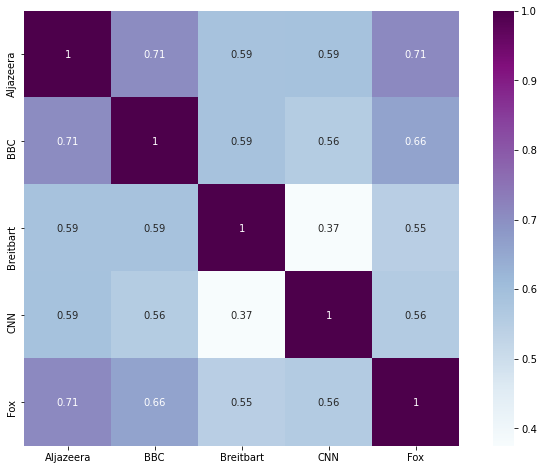

In [11]:
## Use heatmap to reflect the similarity level
DTM_sim= DTM_sim.astype(float)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(DTM_sim, annot = True, square= True, cmap="BuPu")

From the Heatmap, we can easily identify the similarity level via the darkness of the square. Aljazeera and Fox are most similar with roughly 0.71 cosine similarity, and Breitbart and CNN are least similar with only 0.37 cosine similarity. To explain that phenomenon, we need to consider what cosine similarity represents before attributing to the ideological stances of each newspapers:
<br>
$$ \cos{\theta} =  \frac{\sum_{i=1}^n a_i b_i}{\left\| a \right\| \left\| b \right\|}$$

In [12]:
[np.count_nonzero(DTM.iloc[i]) for i in DTM.index.values]

[186, 325, 178, 99, 169]

That means the length of newspapers (after dropping the stopwords) matters, implying a short news (more zero in the DTM due to not covering words that appear in other news) could __partially__ explain the low similarity. Not surprisingly, CNN has a relatively low similarity with other agencies, while BBC has a relatively high similarity with other newspapers. Also, the frequency of each word matters and might  __partially__ explain the similarity. Moreover, ideological divergence might also explain why CNN, a left-leaning agency, share a low similarity with Breitbart, a far-right news. A more appropriate similarity could be creating a weighting factor: $$W_i =\frac{Length_i}{Leng_{matrix}}$$ after dropping the common words.